# Cats vs Non-cats using Transfer Learning -
## What is Transfer Learning?
* Transfer learning has become so handy for computer vision geeks.

* It’s basically a mechanism where the knowledge acquired by training a model for achieving a task is efficiently modified or optimized in order to accomplish the second related task.

* For example, a neural network trained on object recognition can be used to read x-ray scans.

* This is achieved by freezing the weights until the initial or mid-layers are learned on the data for task A, removing the last layer or a few of the last layers, and adding new layers and training those parameters using the data for task B.

## Why Transfer Learning?
The Transfer Learning technique is very useful because:

Using a well-trained model which performs really great for task A, we can develop a model which performs elegantly for task B, though we have fewer data available for task B

There are fewer parameters to be trained (only last layer/layers) and thus less training time,

There is less demand for heavy computational resources like GPU, TPU (but still depends on the data available for task B).

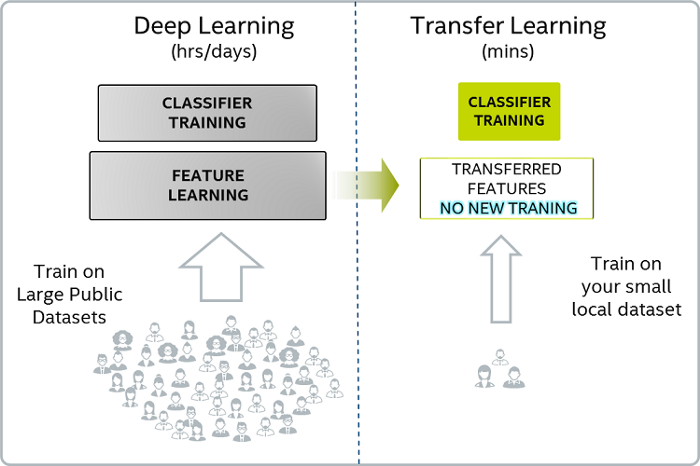

## How do we do Transfer Learning?
Transfer learning makes sense when the data in training for task A is quite large and that of task B is relatively smaller.

* By getting trained on such vast amounts of data and showing excellent performance on its test data, this implies that the neural network has a good knowledge of extracting useful features from the input images. This is essential and powerful for achieving a task.

* Now that we have such powerful features from these layers (whose weights from task A are frozen), we just need to make use of these extracted features to achieve task B. So, these features from frozen layers are fed to the new layers, and the parameters for these layers are trained on the data of task B.

So basically, we store the knowledge from the previous task in the form of the weights of the frozen layers (called pre-training). Then we make the neural network task B-specific by training (called fine-tuning) the latter layers on the new data.

* In our project, we will be using pre-trained models which were trained to classify a large set of images(which is the task A), and fine-tune it to make the classifier specific to our classification task of cats vs non-cats(which is task B).

## What are we going to do now?
* We are going to build a model to classify cats vs non-cats, using transfer learning.
* We are going to build it on top of the pre-trained VGG16 models.
* We shall use the weights of the model, and fine-tune it by adding some layers on top of that, in order to customize it for our own purpose - cat vs non-cat classification.
* We use the same weights of the CNNs by freezing them, and we remove the top(which are dense layers) to add our customized dense layers. The customized top dense layers are trained(which is known as fine-tuning), to make them especially learn about our data set.

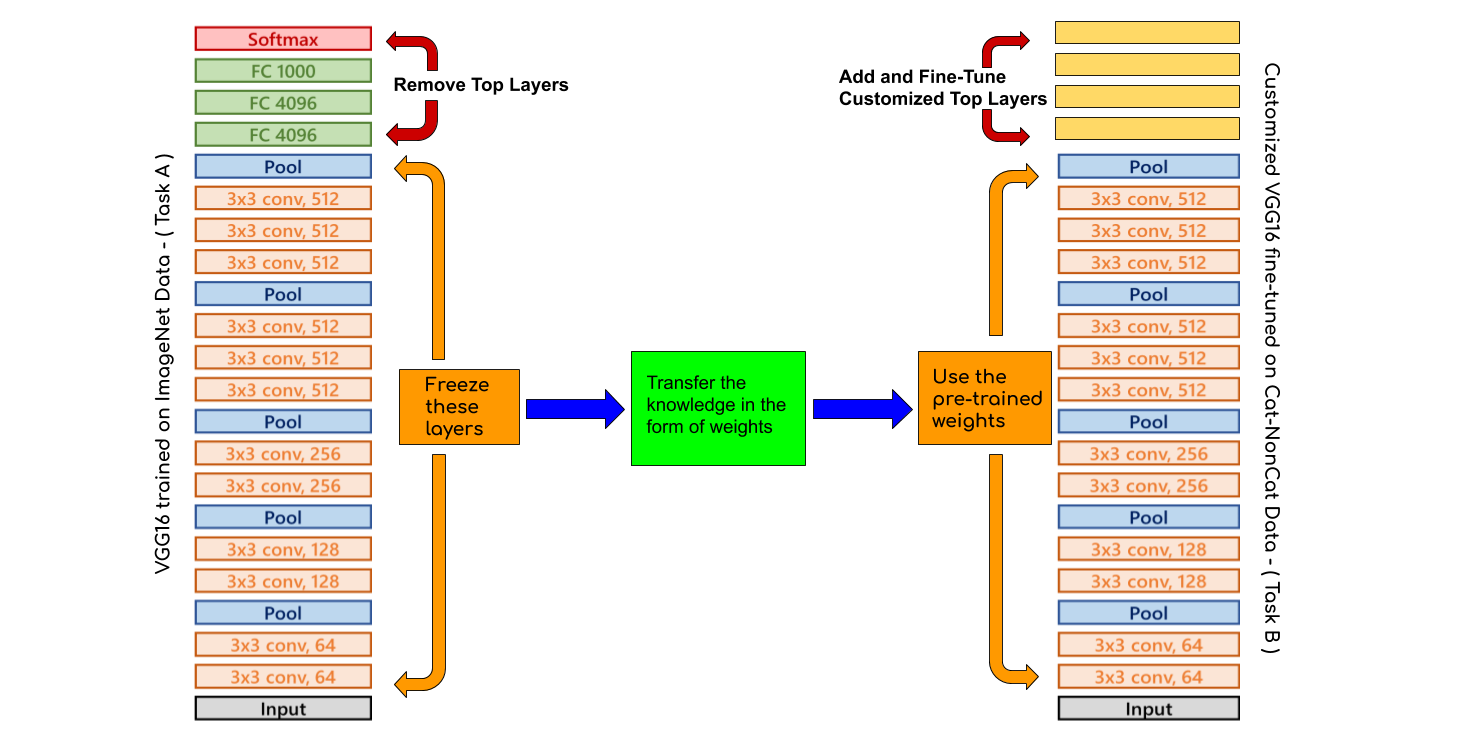

## The VGG16 Model
Firstly, let us know about the VGG16 model pre-trained on the Imagenet database.

* The VGG16 is a trained CNN primarily built to classify 1000 classes of the ImageNet database.

* It is built by using roughly 1.2 million training images, 50,000 validation images, and 150,000 testing images.
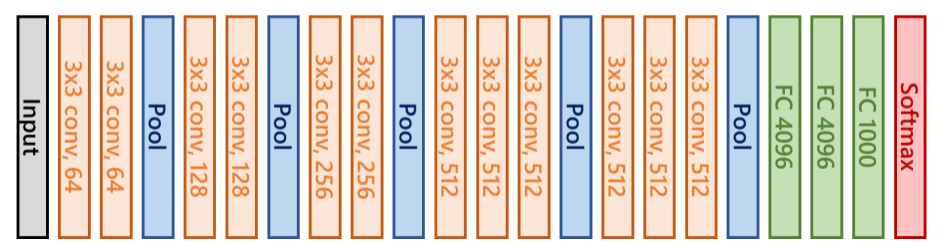

## Workflow

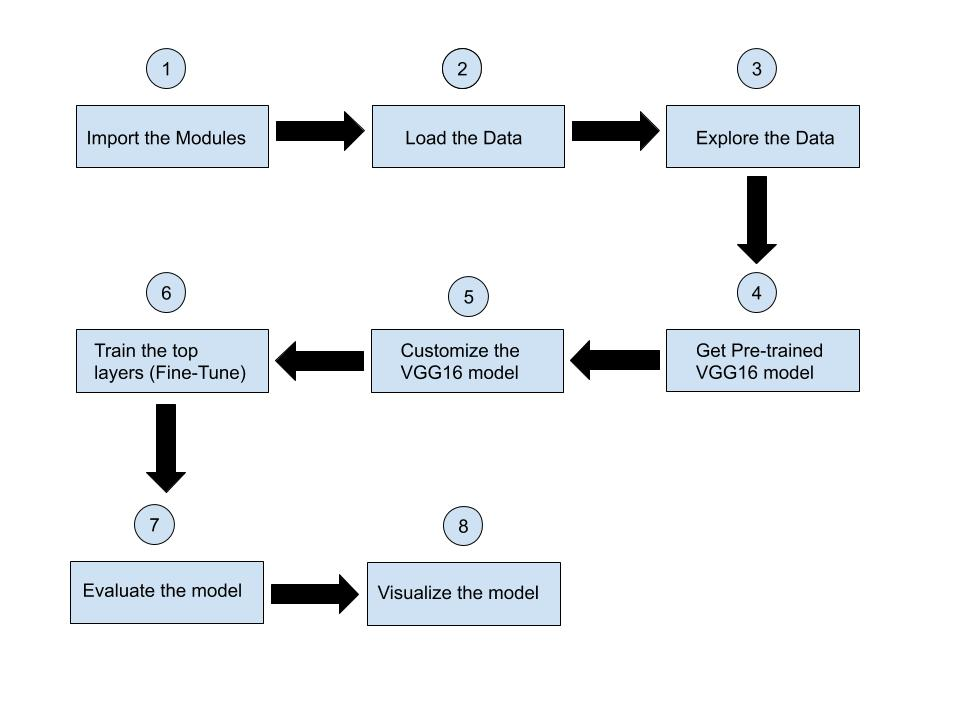

In [15]:
# Importing the Modules

import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
np.random.seed(42)
tensorflow.random.set_seed(42)

In [16]:
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")
test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")

In [17]:
print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


The train_dataset and test_dataset are HDF5 file objects. They have the data stored in a hierarchical format. Let us access the data and store it in form of numpy array as follows:

In [18]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


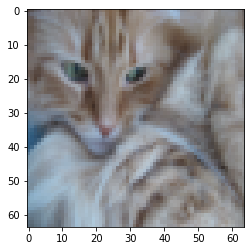

In [19]:
#Visualize the Data
classes = np.array(test_dataset["list_classes"][:])

print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))

plt.imshow(train_set_x_orig[2])

In [20]:
#Shape of the data
validation_x = test_set_x_orig[:25]
validation_y = test_set_y_orig[:25]

test_set_x =test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]

In [21]:
print("train_set_x shape: ", train_set_x_orig.shape)
print("train_set_y shape: ", train_set_y_orig.shape)

train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (209,)


In [22]:
print("Validation data size: ",validation_x)
print("Validation data size: ",validation_y)

Validation data size:  [[[[158 104  83]
   [161 106  85]
   [162 107  84]
   ...
   [170 120 100]
   [167 121 103]
   [172 127 109]]

  [[158 103  82]
   [160 104  82]
   [162 105  83]
   ...
   [169 118  99]
   [164 117  98]
   [168 121 104]]

  [[158 104  82]
   [161 105  82]
   [162 105  83]
   ...
   [173 123 102]
   [169 122 104]
   [168 122 104]]

  ...

  [[102  68  52]
   [ 44  31  23]
   [ 28  23  20]
   ...
   [163 118 102]
   [163 120 103]
   [166 121 105]]

  [[ 99  67  51]
   [ 38  28  22]
   [ 30  26  23]
   ...
   [161 117 100]
   [164 121 104]
   [168 123 106]]

  [[127  95  72]
   [ 39  29  22]
   [ 30  25  22]
   ...
   [165 122 105]
   [169 126 109]
   [173 128 110]]]


 [[[115 110 111]
   [137 129 129]
   [155 146 145]
   ...
   [159 156 157]
   [141 141 145]
   [121 122 127]]

  [[123 118 120]
   [143 136 136]
   [159 153 150]
   ...
   [167 164 165]
   [151 151 154]
   [130 133 137]]

  [[135 130 130]
   [150 145 141]
   [164 159 153]
   ...
   [173 174 172]
   [1

In [23]:
print("test_set_x shape: ",test_set_x)
print("test_set_y shape: ",test_set_y)

test_set_x shape:  [[[[209 133  53]
   [207 130  51]
   [181 107  38]
   ...
   [ 28  16   2]
   [ 24  15   2]
   [ 20  14   2]]

  [[218 142  59]
   [216 140  58]
   [202 126  50]
   ...
   [ 29  17   3]
   [ 25  15   3]
   [ 22  15   3]]

  [[227 151  66]
   [226 149  64]
   [217 139  59]
   ...
   [ 29  17   4]
   [ 25  15   4]
   [ 21  14   3]]

  ...

  [[ 21  11   2]
   [ 23  13   3]
   [ 26  14   3]
   ...
   [109  98 103]
   [104  94  99]
   [102  91  97]]

  [[ 21  11   2]
   [ 23  13   3]
   [ 25  13   4]
   ...
   [109 100 105]
   [103  94  99]
   [ 98  90  94]]

  [[ 20  11   2]
   [ 22  12   3]
   [ 23  13   3]
   ...
   [102  90  95]
   [ 97  86  90]
   [ 94  84  89]]]


 [[[247 205 148]
   [248 207 149]
   [249 209 148]
   ...
   [116  46   5]
   [128  58  10]
   [137  66  11]]

  [[244 200 143]
   [242 199 144]
   [234 190 134]
   ...
   [117  46   5]
   [119  50   6]
   [124  53   7]]

  [[240 193 137]
   [239 193 138]
   [208 154 100]
   ...
   [115  45   4]
   [118  

We observe that we have very small data.

So using transfer learning, we could come up with a decent model yielding reasonable accuracy by using our tiny dataset.

## Getting Pre-Trained VGG16 base model
The trained VGG16 model is available with tensorflow.keras.applications. We have imported this as from tensorflow.keras.applications import VGG16 in the Import Modules section.

Now let us see how we could use.

In [24]:
vgg_base = VGG16(weights='imagenet', include_top=False)

vgg_base.trainable=False

**Explanation:**

We have got an instance of the VGG16 model which is trained on 'imagenet' data.

Since we want to customize it for our purpose of cat-vs-noncat classification, we remove the top layers which are the dense layers.

We put the vgg_base layers are not trainable by setting vgg_base to False, so that we could use the same weights of the Convolutional layers as used in the VGG16 imagenet data.

## Customizing VGG16 base model
We shall add the dense layers on top of the pre-trained layers, so as to make it learn about our cat vs non-cat dataset, and use it on our test data.

Let us see how we could do that.

Create the input layer

In [25]:
inp = Input(shape=(64, 64, 3), name='image_input')

Since our dataset has images of shape 64 x 64 x3, we shall set the shape of the input image the same. Also, we shall give the name of the layer as image_input.

In [26]:
#initiate a model
vgg_model = Sequential()

In [27]:
#Add the VGG base model
vgg_model.add(vgg_base)

In [28]:
# add the dense layers which we would train further:
vgg_model.add(GlobalAveragePooling2D())

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.6))

vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dropout(0.5))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.4))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.3))

vgg_model.add(Dense(1, activation='sigmoid'))

We have first added the GlobalAveragePooling2D layer, and then the dense layer with 1024 neurons and activation function relu.

Observe that the Dropout rate is 0.6, which means 60% of neurons will be randomly ignored during each pass in the training phase in order to make sure the network doesn't overfit. Note that dropout won't be functioning during the test time.

Similarly, other dense and dropout layers were added. At last, a dense layer with 1 neuron is added, which is the output layer. Thus, we have put the activation function sigmoid

## Compile the VGG16 model
In addition to adding the custom dense layers to train, we should also mention some other factors like:

* the optimization algorithm
* learning rate
* loss function
* metrics of evaluation and others.

We shall now see how to do this.

In [34]:
#Instantiate SGD optimizer with learning rate lr=0.025
sgd = SGD(lr=0.025)

Now let us compile the vgg_model and mention the loss as 'binary_crossentropy' since this is a binary classification, optimizer as sgd which we mentioned above, and metrics as accuracy.

In [35]:
vgg_model .compile(loss='binary_crossentropy', optimizer=sgd,    metrics=['accuracy'])

## Training the Top Layers of the VGG16 model

In [40]:
vgg_model.fit(train_set_x_orig, train_set_y_orig, epochs=10, verbose=1, validation_data=(validation_x, validation_y))

Train on 209 samples, validate on 25 samples
Epoch 1/10
209/209 [==============================] - 3s 13ms/sample - loss: 27.8695 - accuracy: 0.5263 - val_loss: 0.5230 - val_accuracy: 0.7600
Epoch 2/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.6574 - accuracy: 0.6651 - val_loss: 0.5303 - val_accuracy: 0.6400
Epoch 3/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.7430 - accuracy: 0.7081 - val_loss: 0.3530 - val_accuracy: 0.7600
Epoch 4/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.4528 - accuracy: 0.8373 - val_loss: 0.2090 - val_accuracy: 1.0000
Epoch 5/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.3711 - accuracy: 0.8517 - val_loss: 0.1913 - val_accuracy: 0.9600
Epoch 6/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.2834 - accuracy: 0.8708 - val_loss: 0.1721 - val_accuracy: 0.9600
Epoch 7/10
209/209 [==============================] - 1s 7ms/sample - loss: 0.2183 - accu

Observe, we are passing the train data and labels, number of epochs, and validation data and labels arguments.

## Evaluating the VGG16 model on test data
Since we have fine-tuned the model by training our custom dense layers on our data, let us check the performance of the model.

In [43]:
vgg_model_loss, vgg_model_acc = vgg_model.evaluate(test_set_x_orig,test_set_y_orig)

50/50 [==============================] - 0s 6ms/sample - loss: 0.2468 - accuracy: 0.8800


In [44]:
print('Test accuracy using VGG16 model as the base:', vgg_model_acc)

Test accuracy using VGG16 model as the base: 0.88


## Visualizing the model
Let us have a complete picture of our new VGG16 model.

We could view that using the summary() method on the vgg_base and vgg_model.

Also, we could visualize them using plot_model, a Keras utility. Let's see how!

*View the architectural summary of the pre-trained model(without the top dense layers), which is our vgg_base, by using vgg_base.summary() as below.*

In [48]:
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [49]:
from tensorflow.keras.utils import plot_model

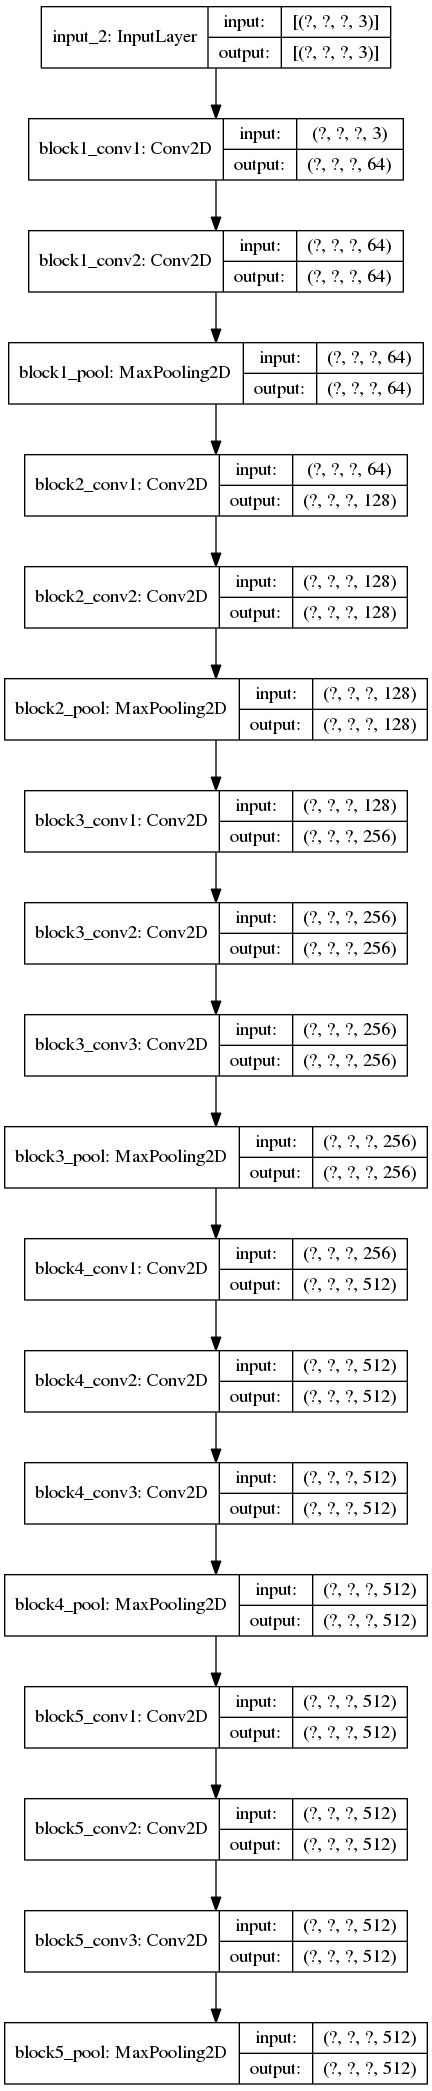

In [50]:
plot_model(vgg_base, show_shapes=True, show_layer_names=True)

* Here, show_shapes=True is used to display the shape of input and output tensors for each layer in the model.

* show_layer_names=True is used to display the layer names.

Similarly, let us view the architectural summary of our custom model built on top of the pre-trained VGG model, which is our vgg_model.

In [51]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)             

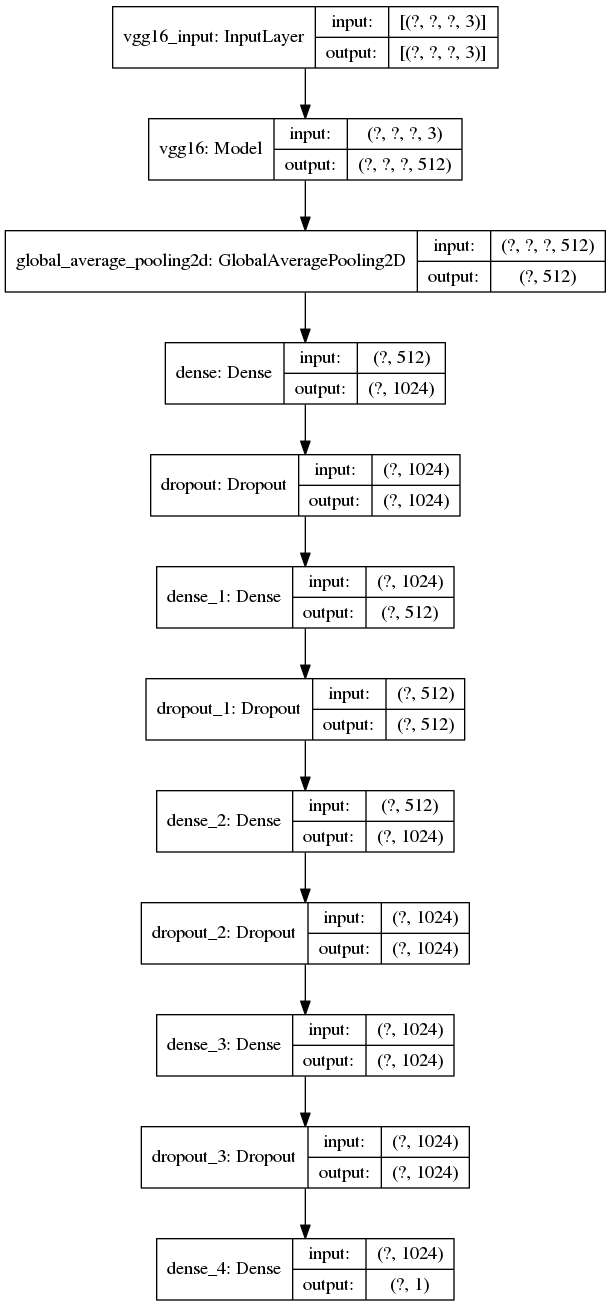

In [52]:
plot_model(vgg_model, show_shapes=True, show_layer_names=True)